In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')
print('Running on PyMC3 v{}'.format(pm.__version__))

Running on PyMC3 v3.6


In [2]:
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace = pm.sample(1000, tune=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:03<00:00, 1816.88draws/s]
The acceptance probability does not match the target. It is 0.9026928961820087, but should be close to 0.8. Try to increase the number of tuning steps.


In [3]:
print(trace, trace['mu'].shape)

<MultiTrace: 4 chains, 1000 iterations, 1 variables> (4000,)


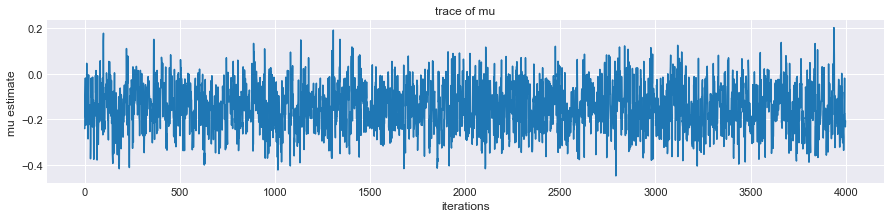

In [4]:
_ = plt.plot(np.arange(len(trace['mu'])),trace['mu'], figure = plt.figure(figsize = [15,3]))
_ = plt.title('trace of mu')
_ = plt.xlabel('iterations')
_ = plt.ylabel('mu estimate')

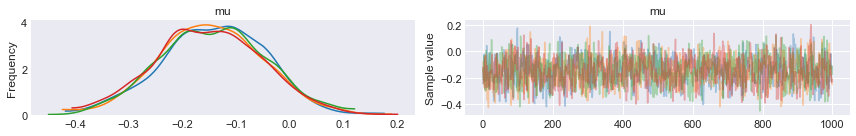

In [5]:
_ = pm.plots.traceplot(trace=trace, varnames=["mu"])

In [6]:
with pm.Model() as model2:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace2 = pm.sample(1000, tune=500, chains = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mu]
100%|██████████| 1500/1500 [00:00<00:00, 3135.47it/s]
Only one chain was sampled, this makes it impossible to run some convergence checks


In [7]:
print(trace2, trace2['mu'].shape)

<MultiTrace: 1 chains, 1000 iterations, 1 variables> (1000,)


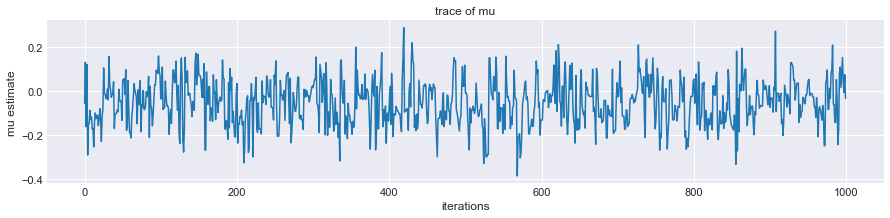

In [8]:
_ = plt.plot(np.arange(len(trace2['mu'])),trace2['mu'], figure = plt.figure(figsize = [15,3]))
_ = plt.title('trace of mu')
_ = plt.xlabel('iterations')
_ = plt.ylabel('mu estimate')

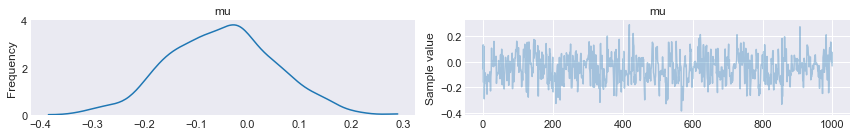

In [9]:
_ = pm.plots.traceplot(trace=trace2, varnames=["mu"])

In [10]:
trace2

<MultiTrace: 1 chains, 1000 iterations, 1 variables>

In [11]:
with pm.Model() as model2:
    mu = pm.Normal('mu', mu=0, sd=1)
    obs = pm.Normal('obs', mu=mu, sd=1, observed=np.random.randn(100))

    trace3 = pm.sample(1000, tune=500, cores = 1)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [mu]
100%|██████████| 1500/1500 [00:00<00:00, 2727.08it/s]


In [12]:
print(trace3, trace3['mu'].shape)

<MultiTrace: 2 chains, 1000 iterations, 1 variables> (2000,)


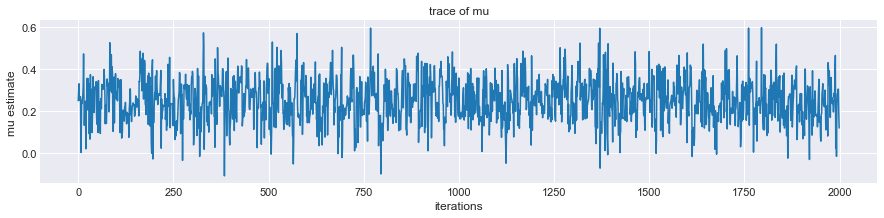

In [13]:
_ = plt.plot(np.arange(len(trace3['mu'])),trace3['mu'], figure = plt.figure(figsize = [15,3]))
_ = plt.title('trace of mu')
_ = plt.xlabel('iterations')
_ = plt.ylabel('mu estimate')

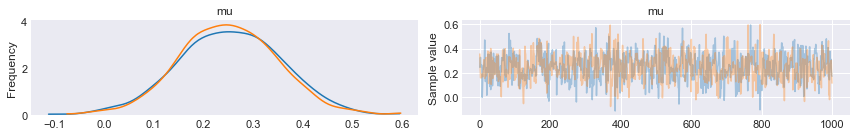

In [14]:
_ = pm.plots.traceplot(trace=trace3, varnames=["mu"])